In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [52]:
df=pd.read_csv("D:\eda\TSLA (1).CSV")

In [53]:
df=df.head(121)

In [54]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
116,2019-11-04,62.959999,64.388000,61.852001,63.493999,43935000,0,0.0
117,2019-11-05,63.924000,64.702003,63.223999,63.444000,34717000,0,0.0
118,2019-11-06,63.599998,65.344002,62.900002,65.316002,39704500,0,0.0
119,2019-11-07,65.828003,68.300003,65.603996,67.108002,72336500,0,0.0


univarite timeseries


In [55]:

stock_data=df[["Date","Close"]]
stock_data.head(5)

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [56]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    121 non-null    object 
 1   Close   121 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


# there are Date datatype object, change to the Date datatype datetime #

In [57]:
stock_data["Date"]=pd.to_datetime(stock_data.Date)

In [58]:
stock_data=stock_data.set_index("Date")
stock_data.head(5)

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


## 2. Study the various characteristics of the data in terms of mean, median, variance, standard deviation. ## 

In [64]:
print("MEAN",df["Close"].mean())
print("STANDARD_DEVIATION",df["Close"].std())
print("MEDIAN",df["Close"].median())
print("VARIANCE",df["Close"].var())



MEAN 47.790942326064936
STANDARD_DEVIATION 6.547564164506505
MEDIAN 46.68399810791016
VARIANCE 42.87059648832976


In [65]:
stock_data.describe()

,Close
count,121.000000
mean,47.790942
std,6.547564
min,35.793999
25%,44.341999
50%,46.683998
75%,49.320000
max,67.428001


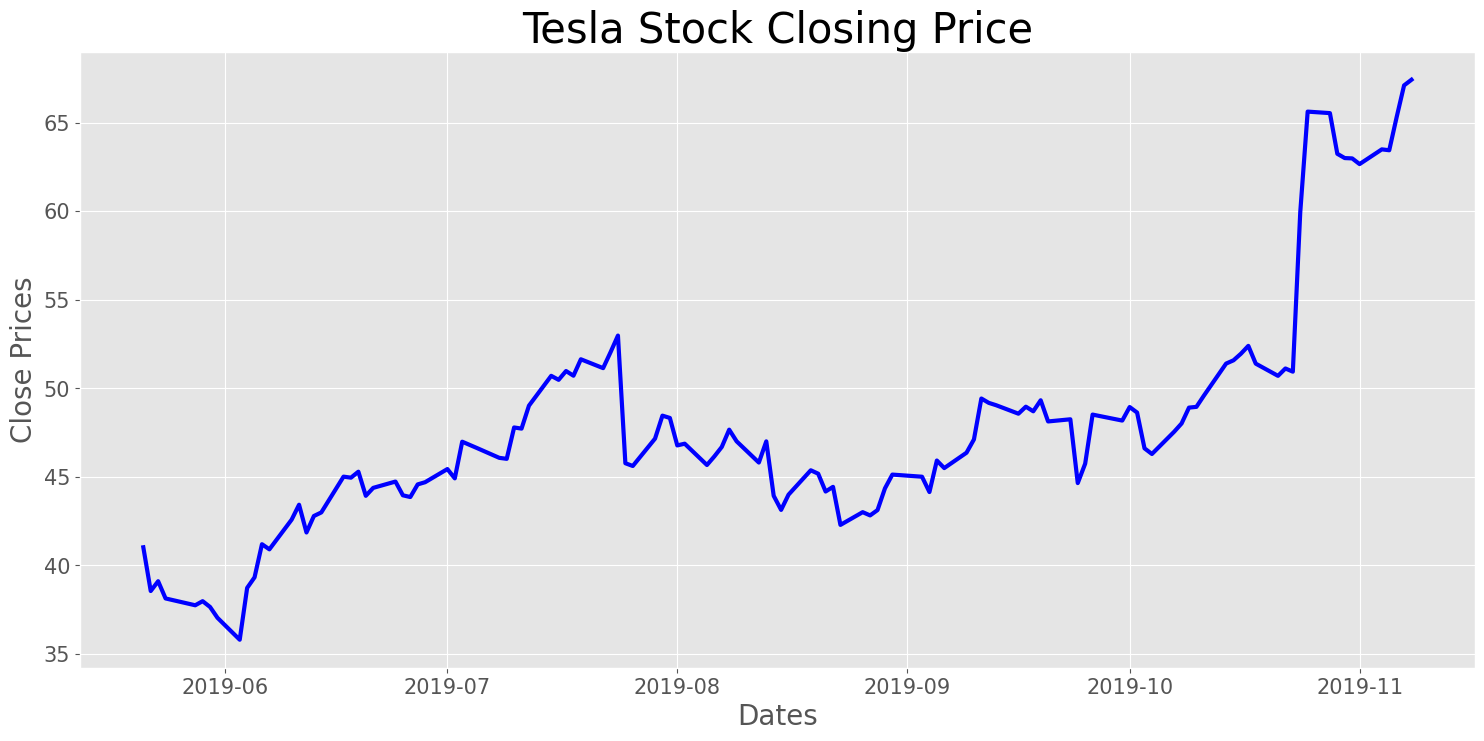

In [ ]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

In [ ]:
x

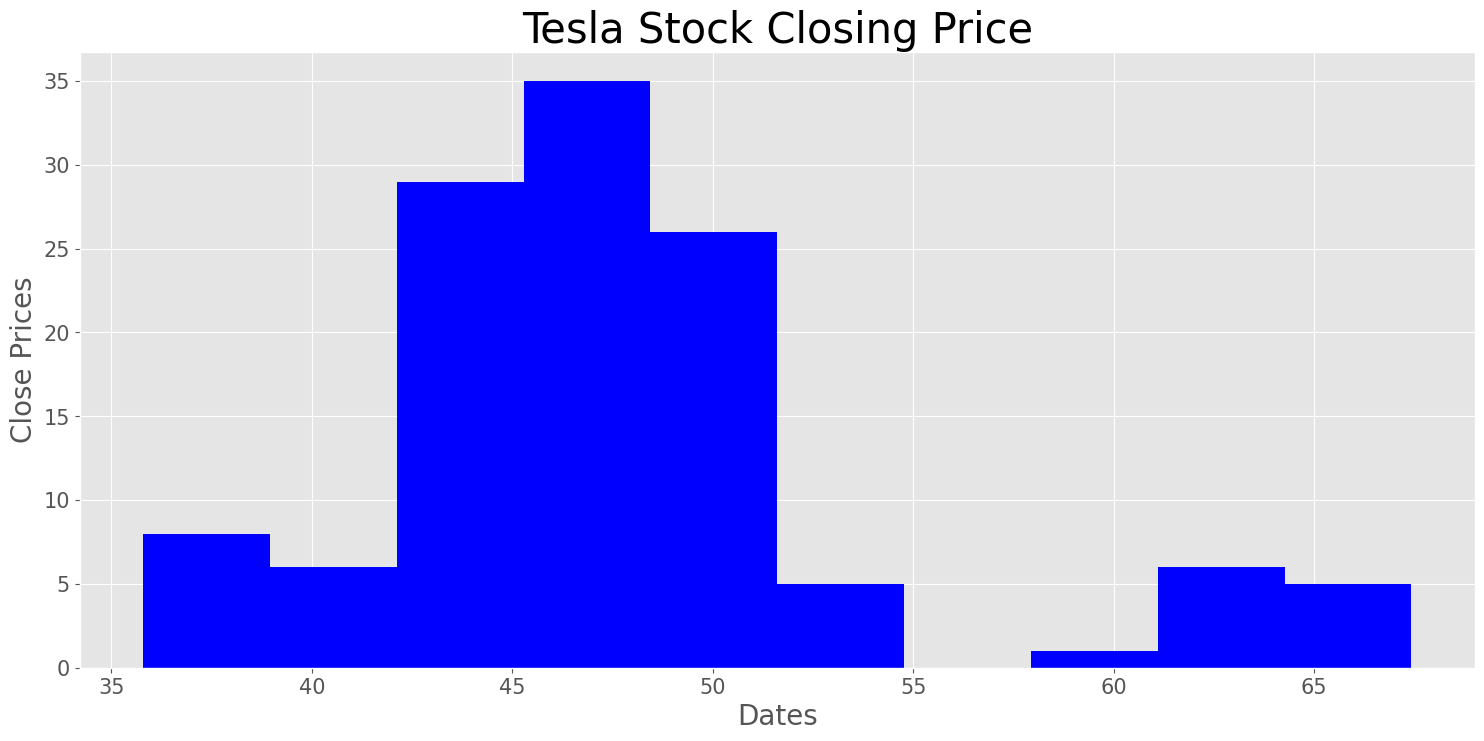

In [ ]:
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

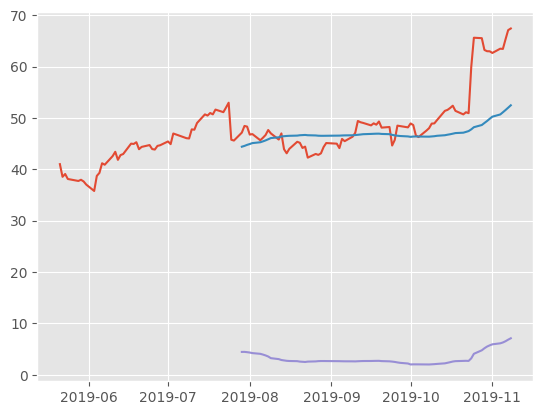

In [ ]:
rolmean=stock_data["Close"].rolling(48).mean()
rolstd=stock_data["Close"].rolling(48).std()
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

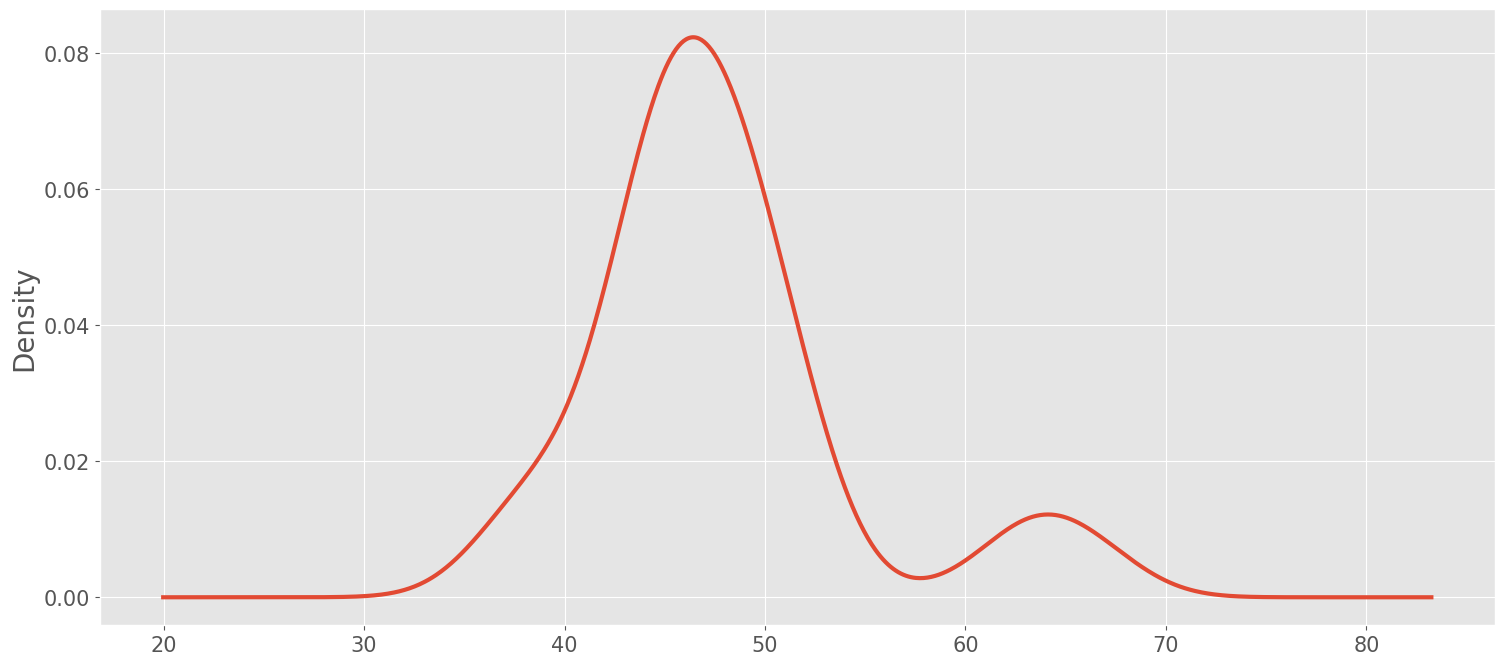

In [ ]:
# Distribution of the close price
df_close = stock_data['Close']
df_close.plot(kind='kde',figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [ ]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])

In [ ]:
pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"])

test stats       0.007973
p-value          0.959187
lag              2.000000
data points    118.000000
dtype: float64

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


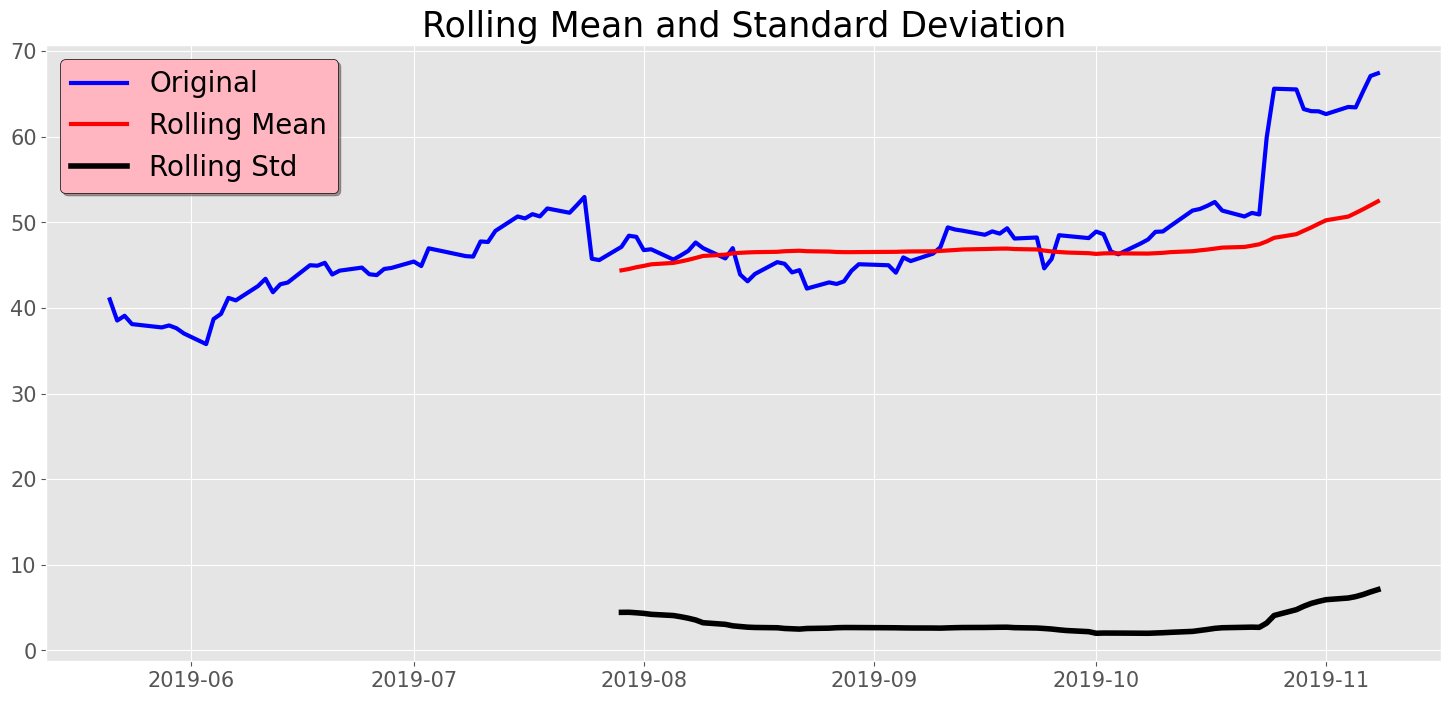

Results of dickey fuller test
Test Statistics                  0.007973
p-value                          0.959187
No. of lags used                 2.000000
Number of observations used    118.000000
critical value (1%)             -3.487022
critical value (5%)             -2.886363
critical value (10%)            -2.580009
dtype: float64


In [ ]:
test_stationarity(stock_data.Close)

 ## Study the patterns of the data. For example, trend, seasonality, etc. 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

In [ ]:
result.seasonal

Date
2019-05-21   -0.827287
2019-05-22    0.202963
2019-05-23    1.028065
2019-05-24    0.216917
2019-05-28   -0.073907
                ...   
2019-11-04    0.363936
2019-11-05   -0.818694
2019-11-06   -0.755916
2019-11-07   -0.850981
2019-11-08   -0.827287
Name: seasonal, Length: 121, dtype: float64

<Figure size 2000x1000 with 0 Axes>

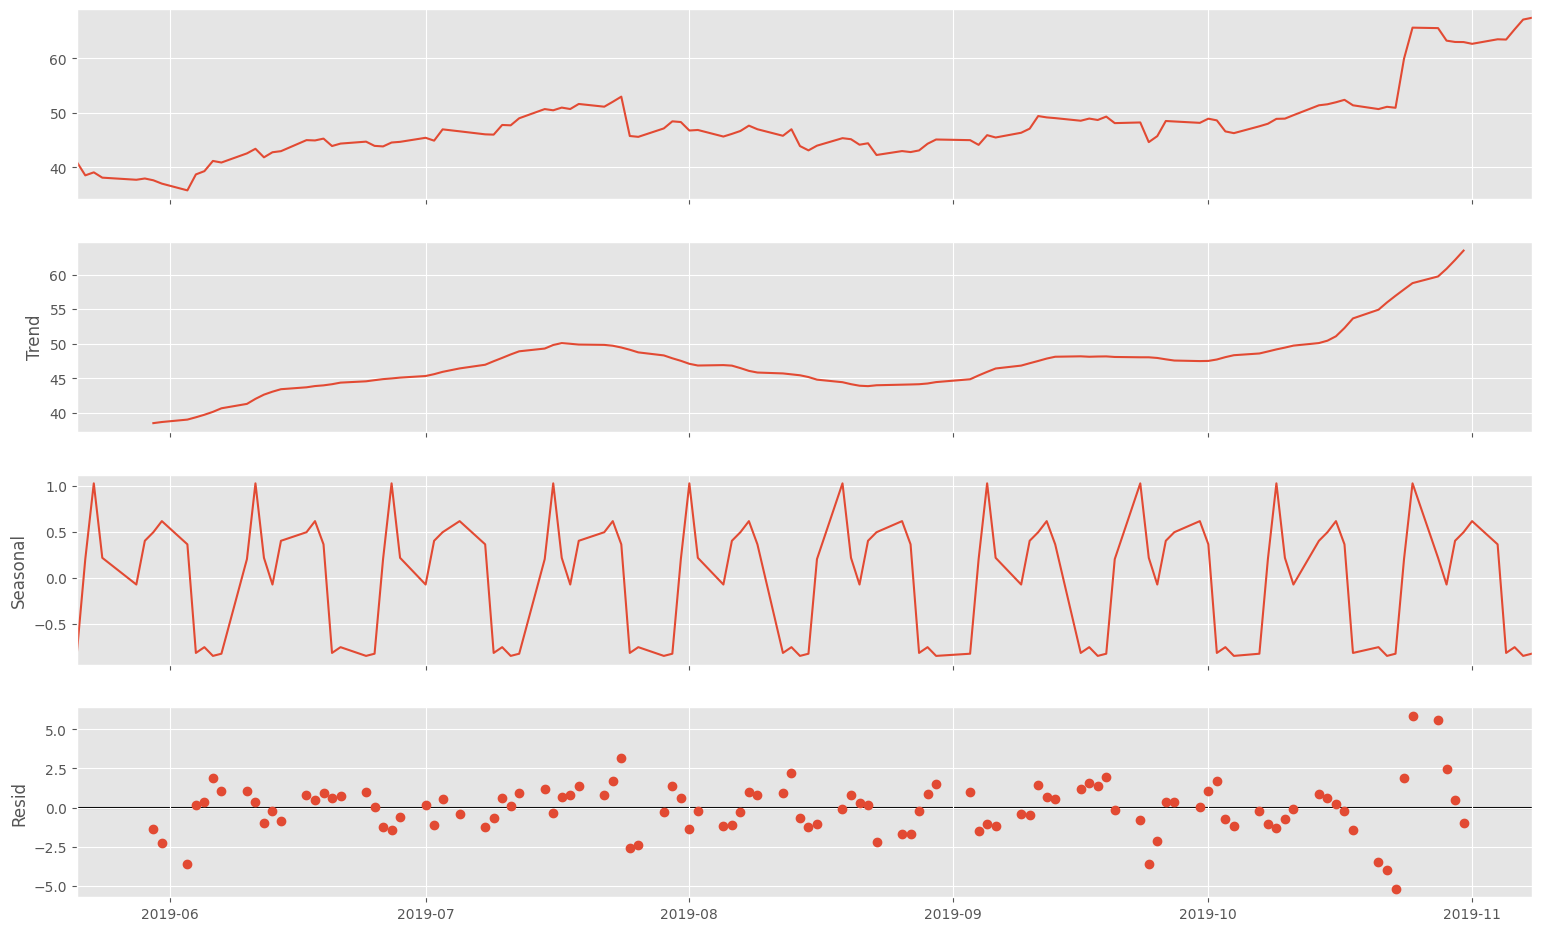

In [ ]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

 ## Decide the model: ARMA or ARIMA. Proper justification is required with evidences regarding the selection of the model.



### Answer:-To decide between ARMA and ARIMA, we need to consider whether the data needs differencing to achieve stationarity. Since the Dickey-Fuller test suggests non-stationarity, an ARIMA model, which includes differencing, might be more suitable.

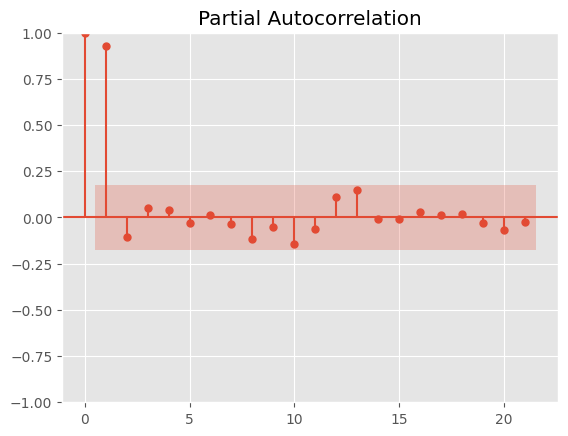

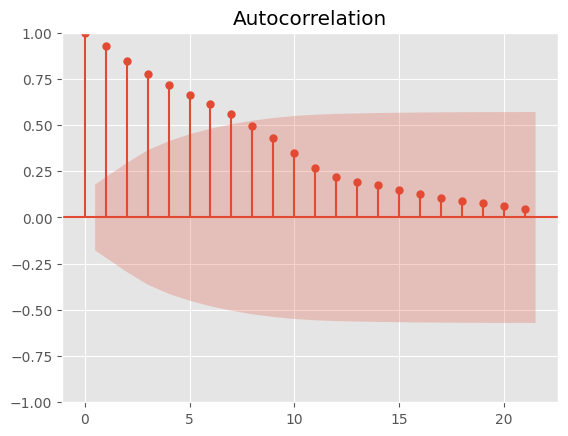

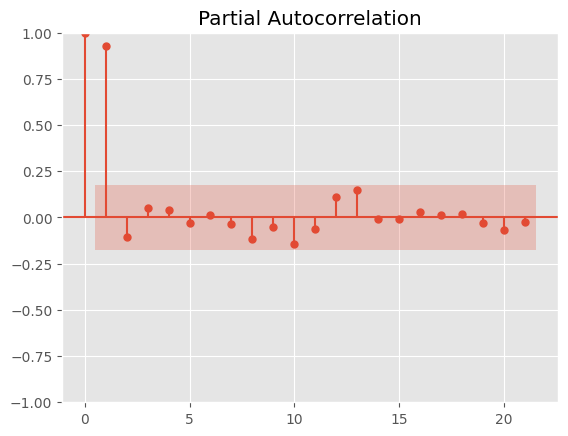

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [ ]:
df_close=stock_data["Close"]

In [ ]:
df_close=df_close.diff()
df_close.dropna()

Date
2019-05-22   -2.469997
2019-05-23    0.551998
2019-05-24   -0.972000
2019-05-28   -0.385998
2019-05-29    0.231998
                ...   
2019-11-04    0.832001
2019-11-05   -0.049999
2019-11-06    1.872002
2019-11-07    1.792000
2019-11-08    0.320000
Name: Close, Length: 120, dtype: float64

In [ ]:
df_close[0:-60]
df_close[-60:]

Date
2019-08-16    0.860001
2019-08-19    1.378002
2019-08-20   -0.194000
2019-08-21   -1.006001
2019-08-22    0.264000
2019-08-23   -2.150002
2019-08-26    0.720001
2019-08-27   -0.183998
2019-08-28    0.301998
2019-08-29    1.223999
2019-08-30    0.780003
2019-09-03   -0.120003
2019-09-04   -0.865997
2019-09-05    1.779999
2019-09-06   -0.425999
2019-09-09    0.868000
2019-09-10    0.750000
2019-09-11    2.311996
2019-09-12   -0.245998
2019-09-13   -0.133999
2019-09-16   -0.478001
2019-09-17    0.396000
2019-09-18   -0.259998
2019-09-19    0.621998
2019-09-20   -1.195999
2019-09-23    0.121998
2019-09-24   -3.604000
2019-09-25    1.098003
2019-09-26    2.771999
2019-09-27   -0.086002
2019-09-30   -0.251999
2019-10-01    0.764000
2019-10-02   -0.312000
2019-10-03   -2.020000
2019-10-04   -0.320000
2019-10-07    1.257999
2019-10-08    0.466000
2019-10-09    0.896000
2019-10-10    0.042004
2019-10-11    0.629997
2019-10-14    1.813999
2019-10-15    0.186001
2019-10-16    0.372002
2019-1

In [ ]:
train_data=stock_data["Close"][0:-60]
test_data=stock_data["Close"][-60:]

## Decide the order of the model. Proper justification is required with evidences regarding the selection of the model.

### The seasonal decomposition of the temperature time series reveals the underlying trend and seasonality components Based on this, an ARIMA(0,1,0) model was fitted to the data. The summary of the model fit is as follows: The dependent variable is close .The number of observations is 499.The model used is SARIMAX(1, 1, 0), which corresponds to an ARIMA(0,1,0) model.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
history=[x for x in train_data]

In [ ]:
model=ARIMA(history,order=(1,1,1))

In [ ]:
model=model.fit()

c:\Users\Bhanu Pratap\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -107.379
Date:                Fri, 22 Dec 2023   AIC                            220.758
Time:                        11:28:38   BIC                            227.041
Sample:                             0   HQIC                           223.216
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3468      1.272      0.273      0.785      -2.145       2.839
ma.L1         -0.4629      1.172     -0.395      0.693      -2.759       1.834
sigma2         2.0982      0.232      9.044      0.000       1.643       2.553
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               189.54
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                            -1.93
Prob(H) (two-sided):                  0.08   Kurtosis:                        10.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Compare the actual values with forecasted values through curve fitting.


In [ ]:
model.forecast()[0]

43.37043460019017

In [ ]:
test_data[0]

43.98799896240234

In [ ]:
test_data[0]

43.98799896240234

In [ ]:
mean_squared_error([test_data[0]],model.forecast())

0.3813857414745169

In [ ]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

0.617564362212164

In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset=dataset.astype("float32")
    best_score,best_cfg=float("inf"),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=train_arima_model(dataset,test,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                        print("ARIMA%s RMSE=%.3f" %(order,rmse))
                except:
                   continue
    print("best ARIMA%s RMSE=%.3f"%(best_cfg,best_score))


In [ ]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=8.345
ARIMA(0, 0, 1) RMSE=4.774
ARIMA(0, 0, 2) RMSE=3.475
ARIMA(0, 1, 0) RMSE=1.760
best ARIMA(0, 1, 0) RMSE=1.760


In [ ]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(0,1,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 1.7596086467565044


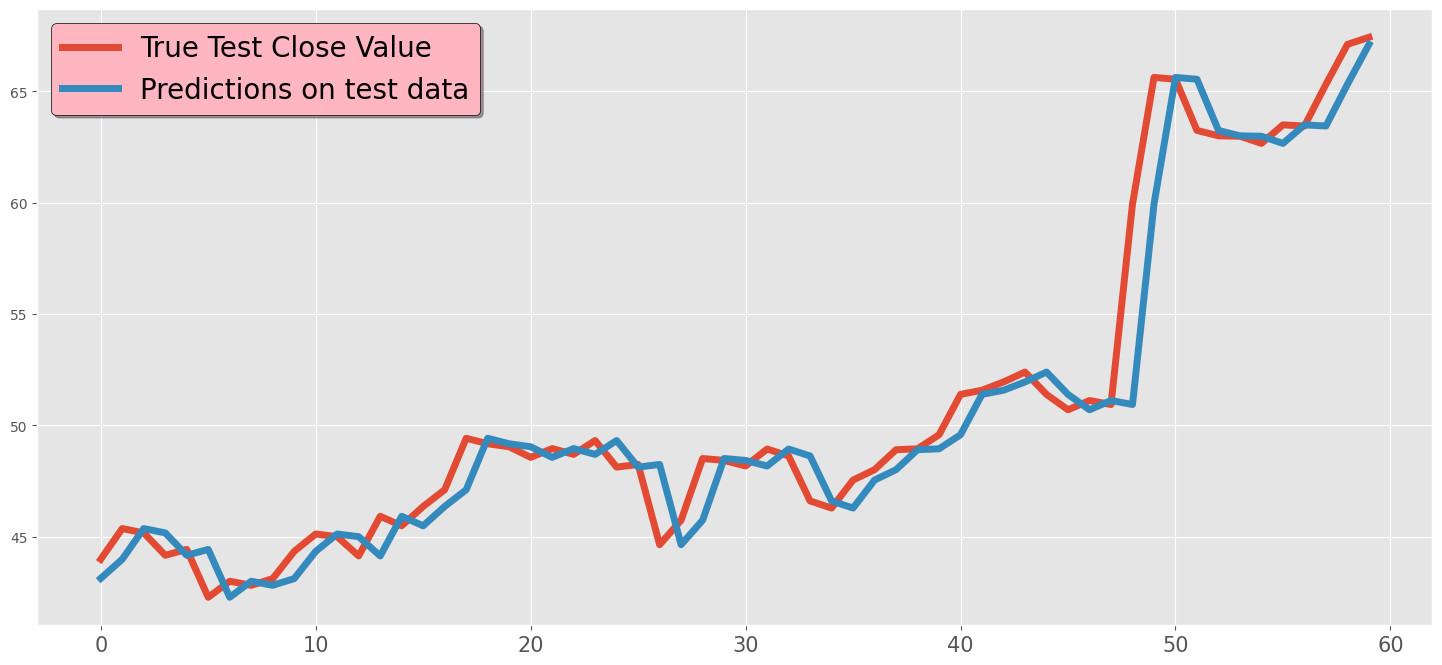

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
fc_series = pd.Series(predictions, index=test_data.index)

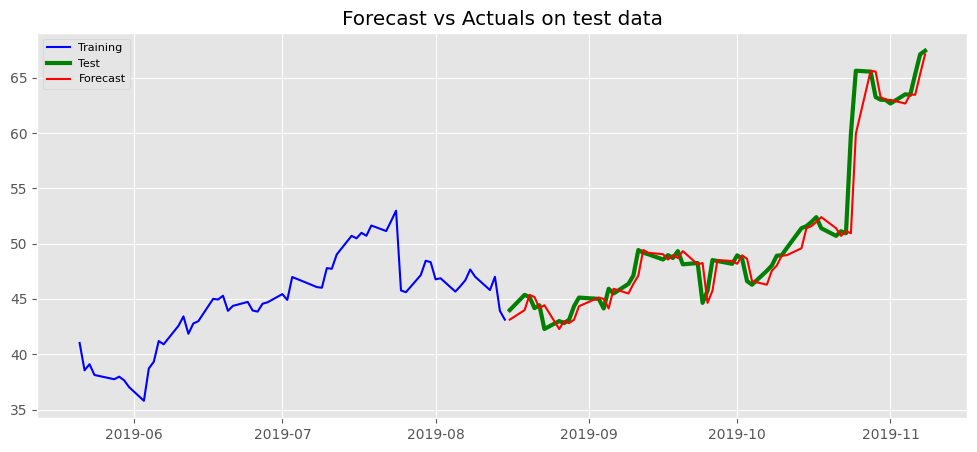

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

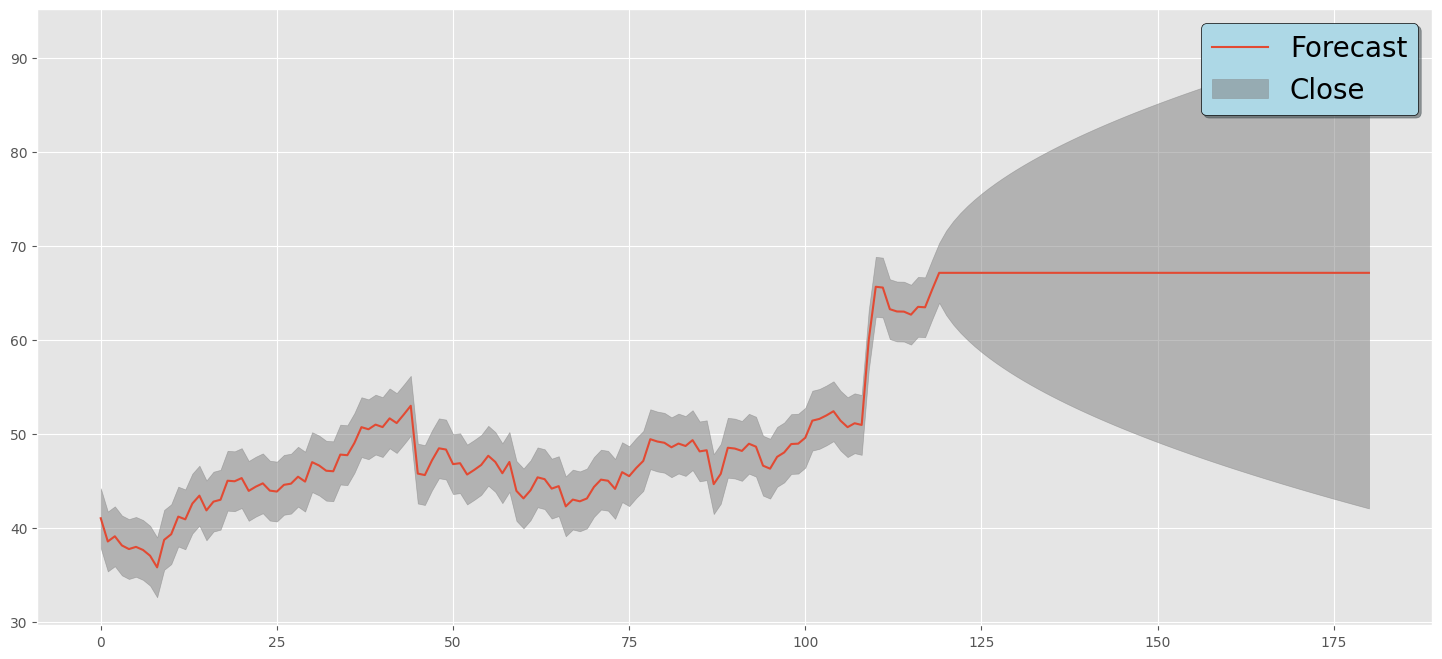

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [ ]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 1.6878993626759229


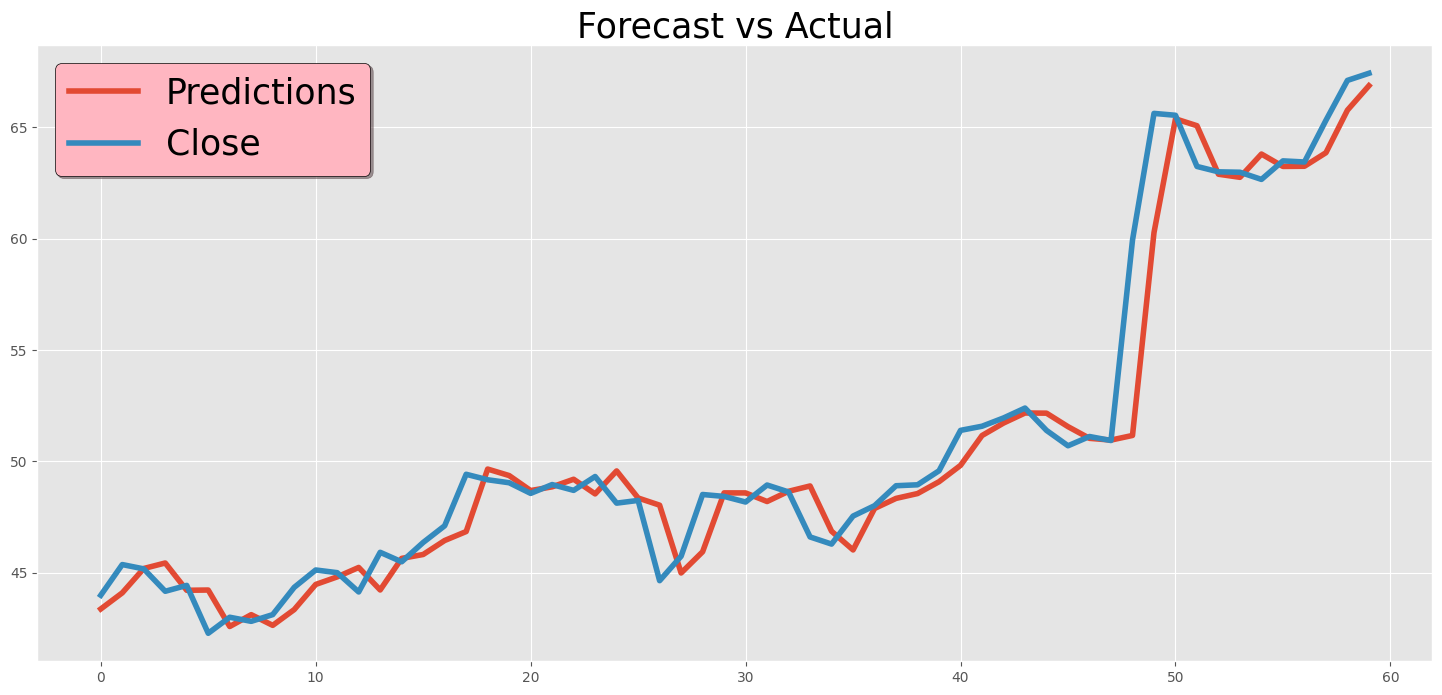

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')